# CREDIT CARD FRAUD DETECTION
Hello everyone! In this notebook we are going to learn classifiers to predict fraud in transactions.

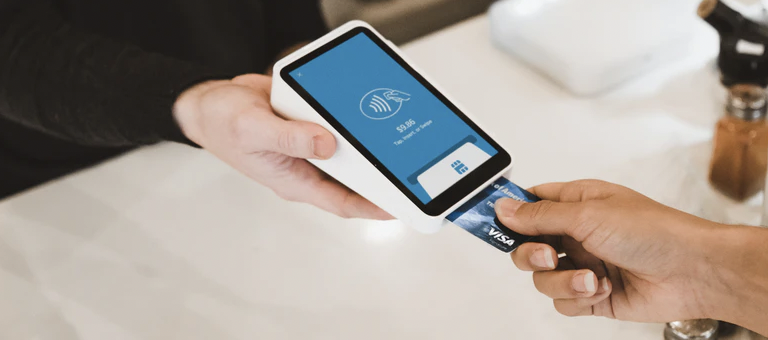

# 1. Import libraries
For classifying tasks we will use [sklearn](https://scikit-learn.org/stable/) library.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from numpy.random import RandomState
import pickle

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

# CLASSIFIERS FOR TRAINING
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

# 2. Read data

In [2]:
df = pd.read_csv('../input/creditcardfraud/creditcard.csv', header = 0)

In [3]:
df.head(7) # look for first 7 rows

In [4]:
df.shape # print size of dataframe

In [5]:
# convert from float64 to float32 to reduce memory size
df = df.astype({col: 'float32' for col in df.select_dtypes('float64').columns}) 
df = df.astype({col: 'int32' for col in df.select_dtypes('int64').columns}) 
# df.dtypes # print types of df

# 3. Visualize data
Firstly, lets see **how many records each class have**.

In [6]:
count_classes = df['Class'].value_counts()
plt.title("Records in each class")
count_classes.plot(kind='bar', color='c')
plt.xticks(rotation='horizontal')
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

After that we can check, **how many records were in each class during all the time**.

In [7]:
# all time was divided to 4 different intervals
bins = [0, max(df['Time'])/4, max(df['Time'])/2, 3*max(df['Time'])/4, max(df['Time'])] 
time_intervals = pd.cut(df['Time'], bins=bins)

In [8]:
# and then we group data by class
df_grouped2 = df.groupby(['Class', time_intervals]).size().reset_index(name='Count')
df_grouped2

After that, we can build **bar charts** for each class.

In [9]:
# creating masks
mask1 = df_grouped2['Class']==0
mask2 = df_grouped2['Class']==1

# applying masks
df_sliced1 = df_grouped2.loc[mask1]
df_sliced2 = df_grouped2.loc[mask2]

In [10]:
# creating plot with 2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,3))

# setting colormaps for each subplot
color1 = plt.cm.spring(np.linspace(0, 1, len(df_sliced1['Time'].unique())))
color2 = plt.cm.winter(np.linspace(0, 1, len(df_sliced1['Time'].unique())))

# drawing plots
df_sliced1.plot(x='Time', y='Count', kind = 'bar', color=color1, title='Class 0', ax=axes[0])
df_sliced2.plot(x='Time', y='Count', kind = 'bar', color=color2, title='Class 1', ax=axes[1])

plt.show()

Also, we can **draw boxplots** to see, how the data is distributed.

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,3))

# titles for plots
axes[0].title.set_text('Class 0')
axes[1].title.set_text('Class 1')

# colors for drawing boxplots (used for 'patch_artist' below)
color1 = dict(boxes="pink")
color2 = dict(boxes="tan")

bplot1 = df_sliced1.boxplot(column=['Count'], grid=False, ax=axes[0], color=color1, patch_artist=True)
bplot2 = df_sliced2.boxplot(column=['Count'], grid=False, ax=axes[1], color=color2, patch_artist=True)

plt.show()

# 4. Normalize data
We will apply **min-max normalization** for our data.

In [12]:
scaler = MinMaxScaler(feature_range=(0, 1))
normed = scaler.fit_transform(df)
df_normed = pd.DataFrame(data=normed, columns=df.columns)
df_normed.head()

# 5. Split to train and val subsets
Here we're going to split data to train and validation subsets as **70% to 30%** respectively *(parameter frac=70)*.

In [13]:
rng = RandomState()

train = df_normed.sample(frac=0.7, random_state=rng)
val = df_normed.loc[~df_normed.index.isin(train.index)]

train.reset_index(drop=True, inplace=True)
val.reset_index(drop=True, inplace=True)

In [14]:
print("♦ TRAIN SET:")
train.head(3)

In [15]:
print("♦ VALIDATION SET:")
val.head(3)

# 6. Split dataset to input and output variables (x and y)
Here we can see, that we should predicit *'Class'* variable, so it will be our 'y' and another columns will represent 'x'.

In [16]:
# form 'x' and 'y' data
x_columns = df.columns[:-1]
y_column = df.columns[-1]

In [17]:
# create 'x' and 'y' data for train
x_raw_train = train[x_columns]
y_raw_train = train[y_column]

X_train = x_raw_train.copy()
Y_train = y_raw_train.copy()

In [18]:
# create 'x' and 'y' data for validation
x_raw_val = val[x_columns]
y_raw_val = val[y_column]

X_val = x_raw_val.copy()
Y_val = y_raw_val.copy()

# 7. Classification itself
Here we are going learn our classificators. 

In [19]:
# list of all classifiers whick will be used for our data
all_classifers = [
    KNeighborsClassifier(2),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression()
]

In [20]:
# there we will store accuracies to build plots and for choosing the best classifier
all_acc = {}

In [ ]:
# learn all classifiers, write accuracy and save trained models in pickle-format

for classifier in all_classifers:
    
    # get the classifier name 
    classfier_name = classifier.__class__.__name__ 
    
    # train model
    model = classifier
    model.fit(X_train, Y_train)
    
    # validate model
    model_pred = model.predict(X_val)
    model_acc = accuracy_score(Y_val, model_pred)
    
    # calculate confusion matrix for train and val subsets
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))
    # titles for plots (1 common and 2 for subplots)
    plt.suptitle(classfier_name, fontsize=14)
    axes[0].title.set_text('Confusion Matrix (Train)')
    axes[1].title.set_text('Confusion Matrix (Val)')
    plot_confusion_matrix(model, X_train, Y_train, cmap=plt.cm.RdPu, ax=axes[0])
    plot_confusion_matrix(model, X_val, Y_val, cmap=plt.cm.GnBu, ax=axes[1])
    
    
    # save its accuracy
    all_acc[classfier_name] = model_acc
    
    # save model
    filename = classfier_name + '_model.pickle'
    pickle.dump(model, open(filename, 'wb'))  
    
    # load model
    loaded_model = pickle.load(open(filename, 'rb'))
    result = loaded_model.score(X_val, Y_val)     
    
    # print results
    print("♦ {:<30} = {:<12} {:>10} = {:>12}".format(classfier_name, round(model_acc, 7),
                                                   "loaded_model score", round(result, 7)))
    
    
    
plt.show() # show plots in the end 

After training, we can build **bar chart** to compare the training results and choose the best trained model with the biggest accuracy score.

In [ ]:
# sort accuracies from biggest to smallest
all_acc = dict(sorted(all_acc.items(), key=lambda item: item[1], reverse=True))

# get keys and values as parameters to build plot
keys = all_acc.keys()
values = all_acc.values()

# color map for bar chart
color = plt.cm.cool(np.linspace(0, 1, len(keys)))

# plot
plt.figure(figsize=(5,5))
plt.title('ACCURACY OF CLASSIFIERS')
plt.xlabel('classifiers')
plt.ylabel('accuracy')
plt.bar(keys, values, color=color)
plt.xticks(rotation = 'vertical')
plt.show()

# 8. Conclusion
Thank you for reading my new article! Hope, you liked it and it was interesting for you! There are some more my articles:

* [Neural Network for beginners with keras](https://www.kaggle.com/maricinnamon/neural-network-for-beginners-with-keras)
* [Fetal Health Classification for beginners sklearn](https://www.kaggle.com/maricinnamon/fetal-health-classification-for-beginners-sklearn)
* [Retail Trade Report Department Stores (LSTM)](https://www.kaggle.com/maricinnamon/retail-trade-report-department-stores-lstm)
* [Market Basket Analysis for beginners](https://www.kaggle.com/maricinnamon/market-basket-analysis-for-beginners)